# **Analisis de TC histórico**

In [128]:
# pip install pandas_datareader

In [129]:
# pip install yfinance

In [130]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import random

from datetime import datetime
# from forex_python.converter import CurrencyRates
import yfinance as yf


**Descarga de los datos de Tipo de Cambio.**


In [131]:
start_date = dt.datetime.today()- dt.timedelta(10000) 
end_date = dt.datetime.today()
stock ="USDMXN=X"
data = yf.download(stock, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [132]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.1776,11.4250,11.1776,11.358,11.358,0
2003-12-02,11.3605,11.3800,11.2740,11.290,11.290,0
2003-12-03,11.3605,11.3605,11.1860,11.245,11.245,0
2003-12-04,11.3550,11.3550,11.1590,11.188,11.188,0
2003-12-05,11.1860,11.2400,11.1230,11.197,11.197,0


In [133]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-09,19.345400,19.442659,19.305901,19.345400,19.345400,0
2024-10-10,19.467449,19.610279,19.429230,19.467449,19.467449,0
2024-10-11,19.438400,19.487249,19.375891,19.438400,19.438400,0
2024-10-14,19.299540,19.366150,19.226400,19.299540,19.299540,0
2024-10-15,19.425949,19.667490,19.368200,19.425949,19.425949,0


In [134]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5438.000000,5438.000000,5438.000000,5438.000000,5438.000000,5438.0
mean,15.304999,15.391285,15.224412,15.305780,15.305780,0.0
std,3.731607,3.760860,3.709647,3.731398,3.731398,0.0
min,9.866500,9.933700,9.834000,9.866500,9.866500,0.0
25%,11.972000,12.021500,11.926675,11.974725,11.974725,0.0
50%,13.679400,13.802850,13.563300,13.691700,13.691700,0.0
75%,18.936217,19.036481,18.843202,18.934487,18.934487,0.0
max,25.315100,25.765341,24.728029,25.336201,25.336201,0.0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5438 entries, 2003-12-01 to 2024-10-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5438 non-null   float64
 1   High       5438 non-null   float64
 2   Low        5438 non-null   float64
 3   Close      5438 non-null   float64
 4   Adj Close  5438 non-null   float64
 5   Volume     5438 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 297.4 KB



Disponemos de informacion desde 2003-12-01 (diciembre 2003) al cierre del último día hábil. Esto representa un total de 5k registros para analizar el tipo de cambio. 

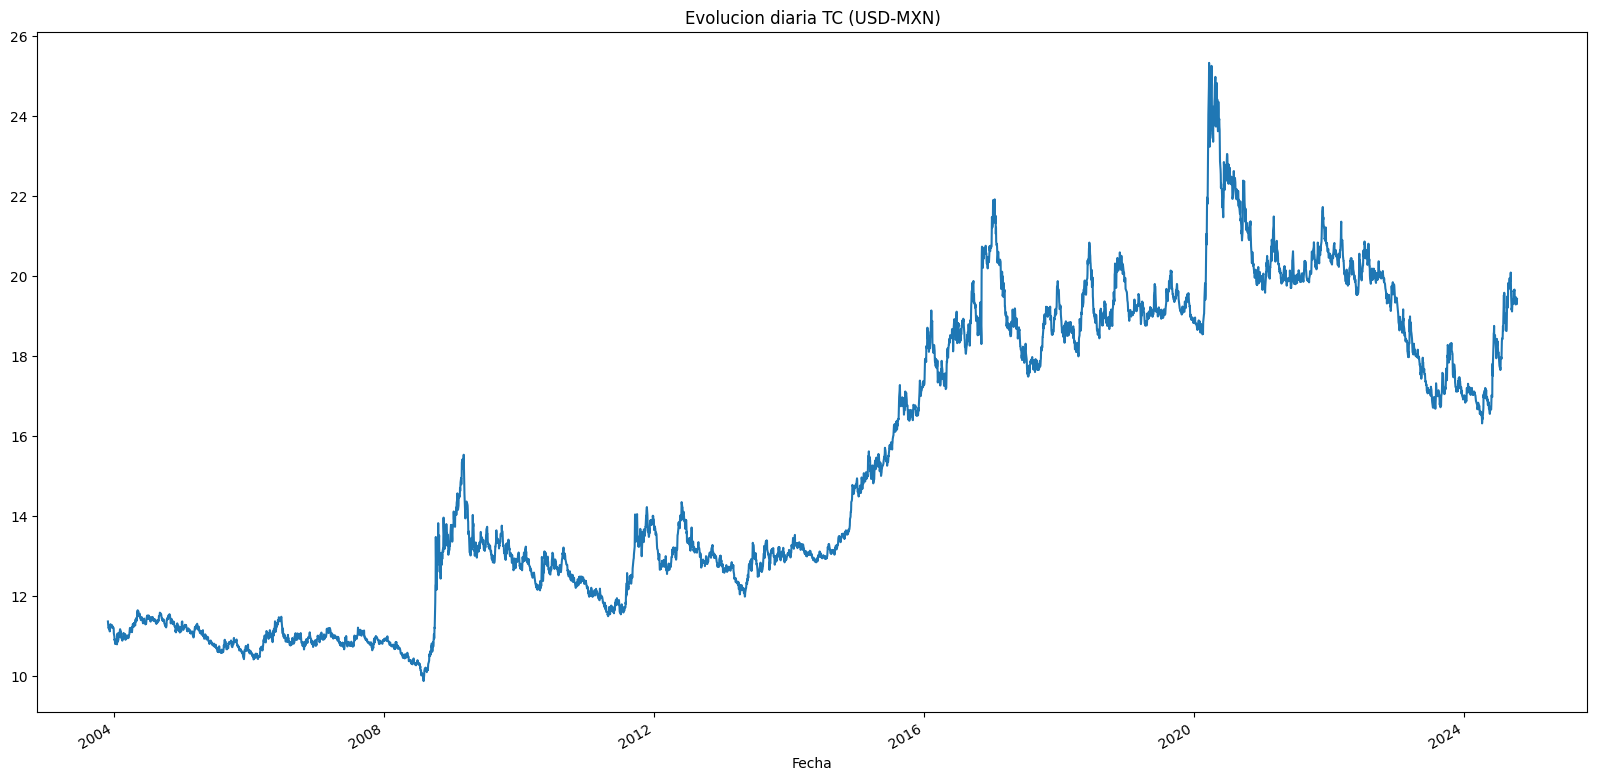

In [136]:
## Procedemos a graficar la informacion dispobible para analizar la completitud de la data. 

plt.figure(figsize=(20,10))
data['Adj Close'].plot()
plt.title('Evolucion diaria TC (USD-MXN)')
plt.xlabel('Fecha')
plt.show()


In [137]:
data['Adj Close'][-1]/data['Adj Close'][0]-1


C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\1940461441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Adj Close'][-1]/data['Adj Close'][0]-1


np.float64(0.710331874973446)

Observando de forma preliminar la grárica, podemos apreciar una evolución incremental constante del tipo de cambio. Respecto a la primera observación  la última, apreciamos un aumento de 73% en el tipo de cambio nominal. (diciembre 2003 vs oct 2024). 

Para complementar el análisis, analizaremos a la par informacion de inflacion, PIB y diversas variables macro economicas de interes. 


In [138]:
inpc = pd.read_csv('data/INPC_BASE_2018.csv')
inpc.head()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1,1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
2,1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
3,1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
4,1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [139]:
inpc.tail()

,ANO,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
51,2020,106.447,106.889,106.838,105.755,106.162,106.743,107.444,107.867,108.114,108.774,108.856,109.271
52,2021,110.210,110.907,111.824,112.190,112.419,113.018,113.682,113.899,114.601,115.561,116.884,117.308
53,2022,118.002,118.981,120.159,120.809,121.022,122.044,122.948,123.803,124.571,125.276,125.997,126.478
54,2023,127.336,128.046,128.389,128.363,128.084,128.214,128.832,129.545,130.120,130.609,131.445,132.373
55,2024,133.555,133.681,134.065,134.336,134.087,134.594,136.003,136.013,NaN,NaN,NaN,NaN


La base descargada contiene los valores del INPC (indexados a 2018) desde 1969 hasta agosto 2024.Con esta data podemos proceder a analizar la evolucion mensual de la inflacion. 

In [140]:
# Indenxaremos los valores para poder acceder a ellos de for iterativa.
inpc.set_index('ANO', inplace=True)
inpc.head()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
1969,0.011595,0.011636,0.011648,0.011680,0.011680,0.011721,0.011766,0.011779,0.011889,0.012014,0.012015,0.012106
1970,0.012198,0.012196,0.012232,0.012248,0.012274,0.012348,0.012409,0.012466,0.012496,0.012500,0.012568,0.012674
1971,0.012799,0.012852,0.012901,0.012967,0.012994,0.013053,0.013043,0.013162,0.013205,0.013218,0.013240,0.013303
1972,0.013362,0.013403,0.013476,0.013561,0.013588,0.013689,0.013740,0.013831,0.013894,0.013904,0.013994,0.014042
1973,0.014246,0.014363,0.014490,0.014719,0.014876,0.014998,0.015382,0.015629,0.016001,0.016206,0.016406,0.017043


In [141]:
inpc.tail()

,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
ANO,,,,,,,,,,,,
2020,106.447,106.889,106.838,105.755,106.162,106.743,107.444,107.867,108.114,108.774,108.856,109.271
2021,110.210,110.907,111.824,112.190,112.419,113.018,113.682,113.899,114.601,115.561,116.884,117.308
2022,118.002,118.981,120.159,120.809,121.022,122.044,122.948,123.803,124.571,125.276,125.997,126.478
2023,127.336,128.046,128.389,128.363,128.084,128.214,128.832,129.545,130.120,130.609,131.445,132.373
2024,133.555,133.681,134.065,134.336,134.087,134.594,136.003,136.013,NaN,NaN,NaN,NaN


In [142]:
for c in inpc.columns:
    inpc[c] = inpc[c].astype(float)

In [143]:
# Con los valores indexados, podemos calcular la inflacion puntual de un mes vs otro. 
(inpc['FEB'][1969]/inpc['ENE'][1969] - 1)*100

np.float64(0.35895277554498506)

In [144]:
# De igual forma, se pueden extraer los valores de inflacion anual
(inpc['ENE'][2023]/inpc['ENE'][2022] - 1)*100


np.float64(7.910035423128425)

## **Transformacion de los datos**

1. Será necesario procesar la data que tenemos del INPC para poder extraer la tasa mensual de inflación.
2. Si queremos agregar variables complementrias al análisis, será necesario procesar la serie de TC, para que ésta la tengamos de forma mensual. Podemos tener diversos abordajes: 
    * Tomar el valor promedio mensual de la serie.
    * Tomar el valor máximo observado de la serie.
    * Tomar la varianza mensual de la serie para estimar volatilidad...

### **Adecuacion de la informacion mensual de inflación para EEUU y MX**

Procesaremos la data para juntarla en un mismo DF; lo cual nos permetirá el asegurarnos que tenemos los mismos periodos comparables entre ambas series de tiempo.

In [145]:
## Generamos un diccionario con los valores mensuales de inflacion con base en la data de inpc.

# Año de inicio de la data de TC de MX.
year = 2004

# Creamos diccionario vacio
inpc_ann  = defaultdict()

# Creamos una bandera de parada para los casos donde el proceso no encuentre valores comparables de inflación
stop = False 


#Iniciamos la valuación mensual de inflación
for y_act in range (year, 2025):
    
    if stop:
        break

    for index,month in enumerate(inpc.columns):

        # Detenemos el proceso si no se encuentra el valor del año/mes dentro del DF de INPC.
        if pd.isnull(inpc[month][y_act]) == True:

            stop = True # Activación de la bandera.
            break

        # Creamos una llave para el diccionario inpc_ann
        if index<9: 
            key = str(y_act) +'-0'+ str(np.sum(index+1))+'-01'
        else: 
            key = str(y_act) +'-'+ str(np.sum(index+1))+'-01'

        # Llenamos el diccionario
        inpc_ann[key] = (inpc[month][y_act]/inpc[month][(y_act-1)]-1)*100



Ya contamos con una serie con el valor mensual de la inflación en MX, procederemos a hacer un DF con el mismo para una mejor manipulación de la data. 

In [146]:
## Observamos un ejemplo de los valores contenidos en el diccionario.
list(inpc_ann.items())[:5]

[('2004-01-01', np.float64(4.201509864150066)),
 ('2004-02-01', np.float64(4.534442667911764)),
 ('2004-03-01', np.float64(4.230728665625083)),
 ('2004-04-01', np.float64(4.210113074608546)),
 ('2004-05-01', np.float64(4.285220261278999))]

In [147]:
## Transformamos el diccionario en un pandas DF.
inf_mx = pd.DataFrame.from_dict(inpc_ann, orient = 'index')
inf_mx.columns = ['ANN_INF']
inf_mx

,ANN_INF
2004-01-01,4.201510
2004-02-01,4.534443
2004-03-01,4.230729
2004-04-01,4.210113
2004-05-01,4.285220
...,...
2024-04-01,4.653210
2024-05-01,4.686768
2024-06-01,4.976056
2024-07-01,5.566164


**Extraemos los datos de inflacion de US**

In [148]:
cpi = pd.read_csv("data/CPI_ANNUAL.csv")
cpi.head()

,MONTH,All_items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
0,2004-09-01,2.5,3.3,3.3,3.3,6.7,9.6,1.6,6.2,2.0,-0.6,-0.7,-1.1,2.3,3.0,3.0,5.0,1.8
1,2004-10-01,3.2,3.4,3.5,3.3,15.2,26.6,0.9,8.0,2.0,0.1,-0.6,-0.4,2.6,2.8,2.7,5.1,1.4
2,2004-11-01,3.5,3.2,3.1,3.2,19.2,30.9,2.3,17.1,2.2,0.5,-0.1,0.3,2.7,2.8,2.7,5.0,1.7
3,2004-12-01,3.3,2.7,2.4,3.0,16.6,26.1,2.1,16.4,2.2,0.6,-0.2,0.6,2.2,2.8,2.7,4.9,1.5
4,2005-01-01,3.0,2.9,2.7,3.2,10.6,14.3,3.5,11.2,2.3,0.9,0.3,1.3,2.3,2.8,2.7,5.0,1.4


In [149]:
# Convertimos el mes en un índice
cpi.set_index('MONTH', inplace = True)

In [150]:
## Generamos un nuevo DF que contenga la informaciión sobre inflacion mensual de cada uno de los países 
inf_cruz = pd.merge(inf_mx[['ANN_INF']],cpi[['All_items']],left_index=True, right_index=True, how = 'left' )
inf_cruz.columns = ['INF_MX', 'INF_EU']
inf_cruz.dropna(inplace = True)
inf_cruz.head()

,INF_MX,INF_EU
2004-09-01,5.060081,2.5
2004-10-01,5.401236,3.2
2004-11-01,5.425294,3.5
2004-12-01,5.190848,3.3
2005-01-01,4.544821,3.0


In [151]:
# Para mejor manipulacion de lsa fechas, convertimos el indice a un datetime
inf_cruz.index = pd.to_datetime(inf_cruz.index)


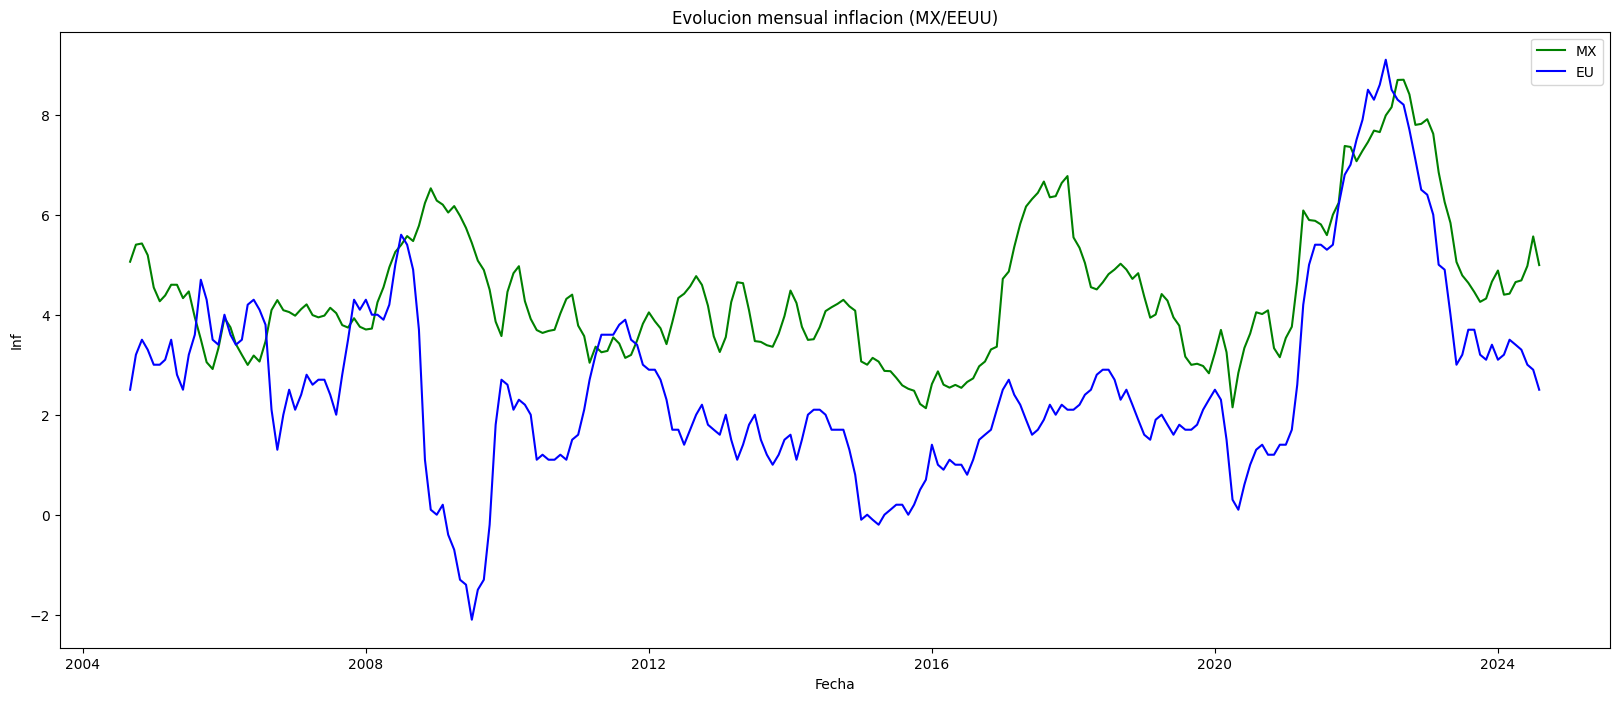

In [152]:
# Generamos una gráfica de la inflacion "cruzada" para validar que contenemos información de aambas series.
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'green')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.legend()
plt.show()

### **Transformación de los valores de TC**

Retomando la data del TC, recordemos que tenemos la información **Diaria** por lo cual, no podría ser comparable contra los demás índices (inflación).

Para esta sección, procesaremos la data de inflación para convertira a diversas temporalidades. 

In [153]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.1776,11.4250,11.1776,11.358,11.358,0
2003-12-02,11.3605,11.3800,11.2740,11.290,11.290,0
2003-12-03,11.3605,11.3605,11.1860,11.245,11.245,0
2003-12-04,11.3550,11.3550,11.1590,11.188,11.188,0
2003-12-05,11.1860,11.2400,11.1230,11.197,11.197,0


Tomaremos el valor más alto observado durante el mes, ya que nos da mayor detalle acerca de la volatilidad en el largo plazo. Tomar el promedio de los TC, podría mitigar la severidad. A su vez, al ser valores de cierre diarios nos da la certeza de que el valor, por alto que sea sí estuvo vigente durante el mes. 

In [154]:
data_men = data.resample('M').max()
data_men.head()

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\3037419826.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_men = data.resample('M').max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-31,11.3605,11.425,11.274,11.358,11.358,0
2004-01-31,11.2223,11.256,11.191,11.191,11.191,0
2004-02-29,11.1820,11.285,11.095,11.165,11.165,0
2004-03-31,11.1990,11.235,11.153,11.196,11.196,0
2004-04-30,11.4225,11.465,11.344,11.412,11.412,0


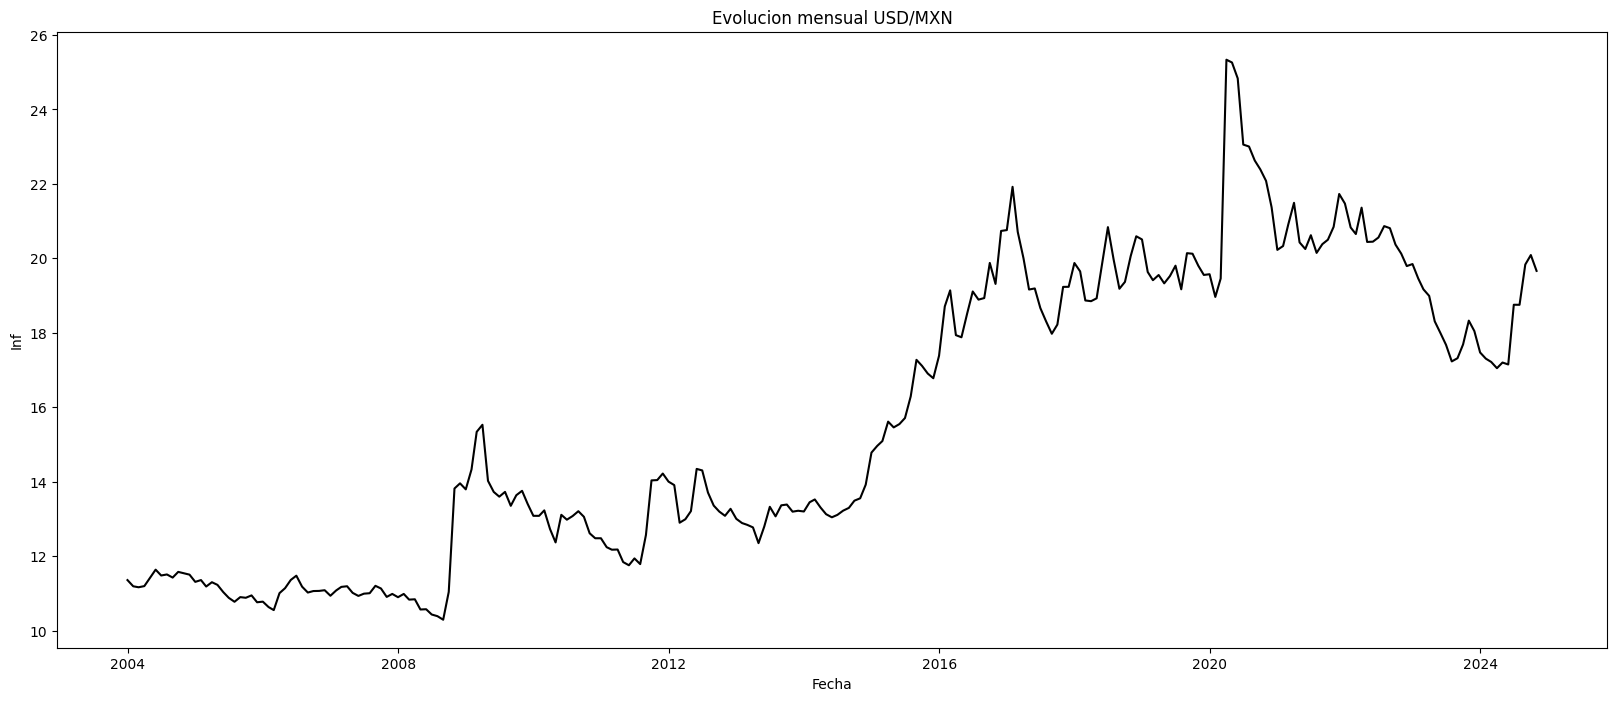

In [155]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual USD/MXN')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(data_men.index, data_men['Adj Close'], label = 'MX', color = 'black')
plt.show()

El paso adixional que queda es el de homologar las fechas del DF de TC. Las observaciones se dan solamente en días hábiles, por lo que al hacer el resampleo para observaciones mensuales, nos quedamos con el primer día observado en el mes como el índice, sin embargo, es probable que no cuadre contra los valores de índices en el DF de inflación. Procederemos a hacer un ajuste. 

In [156]:
# Reemplazar el día de cada fecha por el primer día del mes correspondiente
data_men.index = data_men.index.to_period('M').to_timestamp('D', how='start')
data_men.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,11.3605,11.425,11.274,11.358,11.358,0
2004-01-01,11.2223,11.256,11.191,11.191,11.191,0
2004-02-01,11.1820,11.285,11.095,11.165,11.165,0
2004-03-01,11.1990,11.235,11.153,11.196,11.196,0
2004-04-01,11.4225,11.465,11.344,11.412,11.412,0


De esta forma, podemos ahora juntar los 3 indicadores. 

In [157]:
inf_cruz = pd.merge(inf_cruz, data_men[['Adj Close']], left_index= True, right_index= True)
inf_cruz.head()

,INF_MX,INF_EU,Adj Close
2004-09-01,5.060081,2.5,11.578
2004-10-01,5.401236,3.2,11.540
2004-11-01,5.425294,3.5,11.504
2004-12-01,5.190848,3.3,11.310
2005-01-01,4.544821,3.0,11.358


In [158]:
# Cambiamos los nombres del DF para tener más claridad.
inf_cruz.columns = ['INF_MX', 'INF_EU', 'TC']

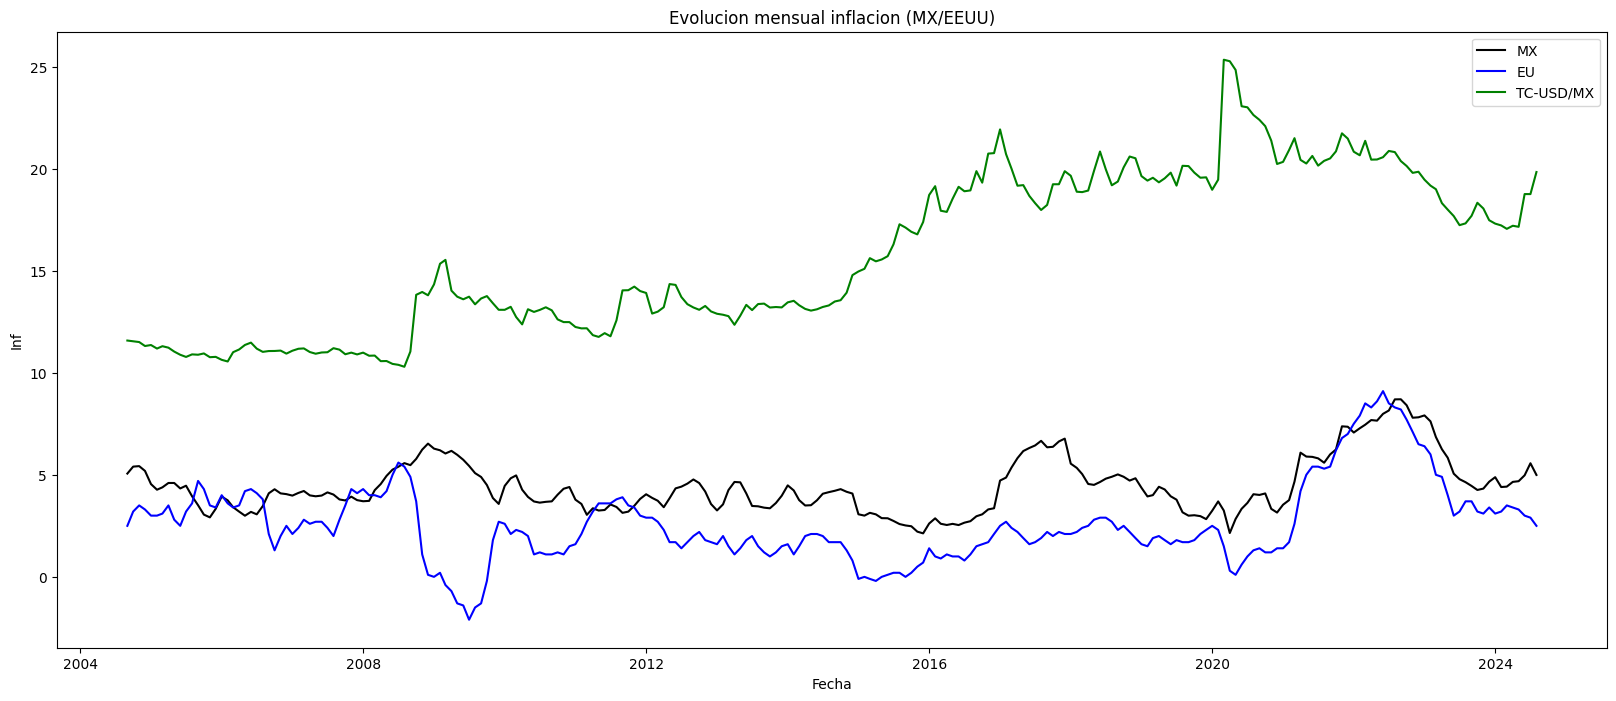

In [159]:
# Inspeccionamos el resultado de juntar los DF con la información.

plt.figure(figsize = (20,8))
plt.title('Evolucion mensual inflacion (MX/EEUU)')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['INF_MX'], label = 'MX', color = 'black')
plt.plot(inf_cruz.index, inf_cruz['INF_EU'], label = 'EU', color = 'blue')
plt.plot(inf_cruz.index, inf_cruz['TC'], label = 'TC-USD/MX', color = 'green')
plt.legend()
plt.show()

## **Análisis Exploratorio**

Observamos un periodo peculiar donde la inflación de EEUU estuvo por debajo de 0, lo resaltaremos en la gráfica para no perder de vista este detalle. 

In [160]:
inf_cruz[inf_cruz['INF_EU']<0]

,INF_MX,INF_EU,TC
2009-03-01,6.043723,-0.4,15.53000
2009-04-01,6.173274,-0.7,14.02360
2009-05-01,5.978525,-1.3,13.72600
2009-06-01,5.736118,-1.4,13.59900
2009-07-01,5.436538,-2.1,13.72700
2009-08-01,5.081960,-1.5,13.35280
2009-09-01,4.894258,-1.3,13.63780
2009-10-01,4.499498,-0.2,13.75580
2015-01-01,3.065642,-0.1,14.96177
2015-03-01,3.137075,-0.1,15.61437


De primera instancia, podemos apreciar los niveles de inflacion en México vs EEUU se mueven en un mismo sentido, sin embargo, en México son más altos. Es en los últimos 4 años que se ha dado una mayor paridad en el indicador. Se aprecia que los últimos meses desde 2023 se ha dado un aumento en la **volatilidad** general de todos los indicadores:TC, Inf_Mex e Inf_EU.



In [161]:
inf_cruz.describe()

,INF_MX,INF_EU,TC
count,240.000000,240.000000,240.000000
mean,4.457330,2.597500,15.784887
std,1.356535,1.944823,3.876075
min,2.130813,-2.100000,10.293000
25%,3.506589,1.500000,12.547525
50%,4.193345,2.200000,14.336700
75%,5.023533,3.500000,19.425049
max,8.699750,9.100000,25.336201


Realizaremos diversos tipos de análisis para entender de forma preliminar si existe una relación entre el TC y las métricas que mencionamos:

1. Diferenciales de Inflacion
2. Correlacion de las series de tiempo
    2.1 Largo plazo
    2.2 Corto plazo
3. Analisis de volatilida del TC.
    3.1 Enfoque corto plazo
    3.2 Enfoque largo plazo. 
    3.3 Analisis de Shocks (Eventos mundiales/locales que podrian impactar)


### **Diferenciales de Inflación**

In [162]:
## Agregamos un nuevo indicador que nos mostrará la diferencia entre las inflacinoes en ambos países:

inf_cruz['DIFF_INF'] = inf_cruz['INF_MX'] - inf_cruz['INF_EU']

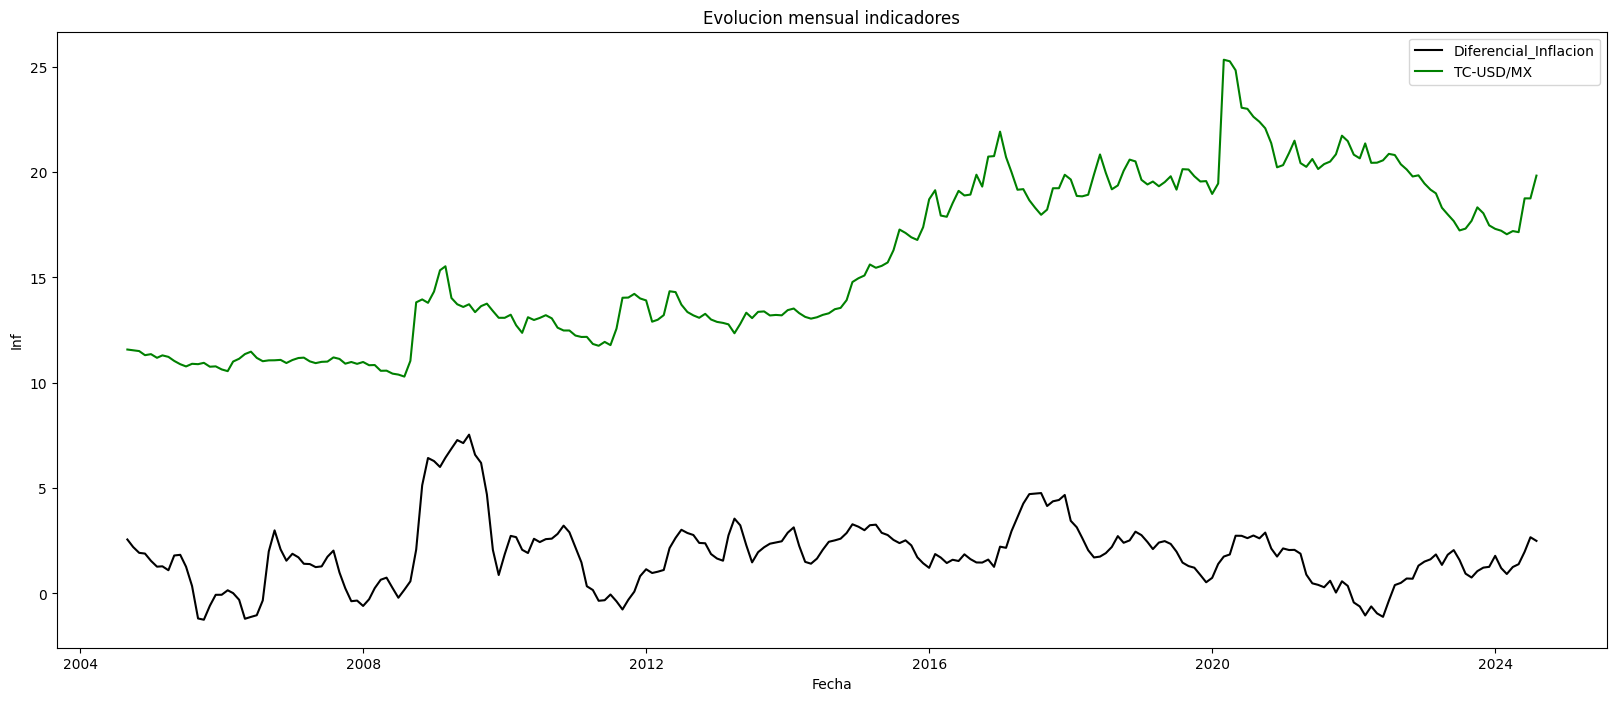

In [163]:
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual indicadores')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['DIFF_INF'], label = 'Diferencial_Inflacion', color = 'black')
plt.plot(inf_cruz.index, inf_cruz['TC'], label = 'TC-USD/MX', color = 'green')
plt.legend()
plt.show()

In [164]:
# Buscamos el valor máximo de 2008

inf_cruz['TC']['2020':'2024']

2020-01-01    18.964199
2020-02-01    19.458969
2020-03-01    25.336201
2020-04-01    25.261999
2020-05-01    24.834490
2020-06-01    23.056570
2020-07-01    23.004499
2020-08-01    22.628401
2020-09-01    22.390400
2020-10-01    22.081600
2020-11-01    21.371950
2020-12-01    20.228239
2021-01-01    20.331530
2021-02-01    20.910900
2021-03-01    21.492491
2021-04-01    20.429100
2021-05-01    20.251169
2021-06-01    20.622000
2021-07-01    20.147141
2021-08-01    20.381500
2021-09-01    20.501101
2021-10-01    20.847000
2021-11-01    21.729601
2021-12-01    21.471569
2022-01-01    20.829000
2022-02-01    20.653601
2022-03-01    21.362391
2022-04-01    20.441299
2022-05-01    20.448200
2022-06-01    20.560659
2022-07-01    20.866461
2022-08-01    20.810909
2022-09-01    20.370741
2022-10-01    20.127411
2022-11-01    19.793200
2022-12-01    19.847300
2023-01-01    19.458799
2023-02-01    19.167999
2023-03-01    18.991899
2023-04-01    18.308800
2023-05-01    17.991400
2023-06-01    17

In [165]:
inf_cruz[inf_cruz['TC']<18]

,INF_MX,INF_EU,TC,DIFF_INF
2004-09-01,5.060081,2.5,11.578000,2.560081
2004-10-01,5.401236,3.2,11.540000,2.201236
2004-11-01,5.425294,3.5,11.504000,1.925294
2004-12-01,5.190848,3.3,11.310000,1.890848
2005-01-01,4.544821,3.0,11.358000,1.544821
...,...,...,...,...
2024-01-01,4.883929,3.1,17.306061,1.783929
2024-02-01,4.400762,3.2,17.217529,1.200762
2024-03-01,4.420939,3.5,17.050060,0.920939
2024-04-01,4.653210,3.4,17.201811,1.253210


In [166]:
inf_cruz['TC']['2014':'2018']

2014-01-01    13.448450
2014-02-01    13.523930
2014-03-01    13.306690
2014-04-01    13.127780
2014-05-01    13.044300
2014-06-01    13.109300
2014-07-01    13.222800
2014-08-01    13.297120
2014-09-01    13.491120
2014-10-01    13.554770
2014-11-01    13.922280
2014-12-01    14.782190
2015-01-01    14.961770
2015-02-01    15.092740
2015-03-01    15.614370
2015-04-01    15.459100
2015-05-01    15.548850
2015-06-01    15.711390
2015-07-01    16.292999
2015-08-01    17.274580
2015-09-01    17.112680
2015-10-01    16.905821
2015-11-01    16.779890
2015-12-01    17.385170
2016-01-01    18.709000
2016-02-01    19.140539
2016-03-01    17.937750
2016-04-01    17.880150
2016-05-01    18.521610
2016-06-01    19.110460
2016-07-01    18.891821
2016-08-01    18.933580
2016-09-01    19.877720
2016-10-01    19.313290
2016-11-01    20.736839
2016-12-01    20.759850
2017-01-01    21.921989
2017-02-01    20.710180
2017-03-01    20.003349
2017-04-01    19.163160
2017-05-01    19.191851
2017-06-01    18

Como primera inspección visual, apreciamos que, cuando los difereciales de inflación han estado elevados, el TC USDMXN se deprecia contra el peso mexicano. Podemos observar 3 principales "etapas" de la evolución del TC. En una primera, comprendida de 2004 -2008 (crisis económica mundial), posteriormente una etapa de crecimiento sostenido del TC para pasar por la pandemia del Covid y dejarnos en una etapa de relativa volatilidad. 

In [167]:
# Agregamos las etapas observadas
# Generamos un diccionario de etapas de la forma. {'llave':List[fecha_inicio, fecha_fin]}

etapas = {'est_10':[datetime(2004, 1, 1), datetime(2008, 10, 1), 'greenyellow'],
          'cris_08':[datetime(2008, 10, 1), datetime(2010, 2, 1), 'darkgrey'],
          'est_13':[datetime(2010, 2, 1), datetime(2014, 5, 1), 'greenyellow'],
          'subida': [datetime(2014, 5, 1), datetime(2017, 2, 1), 'chocolate'],
          'est_18': [datetime(2017, 2, 1), datetime(2020, 2, 1), 'greenyellow'],
          'pandemia':[datetime(2020, 2, 1), datetime(2020, 7, 1), 'darkgrey'],
          'vol': [datetime(2020, 7, 1), datetime(2024, 9, 1), 'navajowhite']
}

In [168]:
import matplotlib

# # np.random.choice(list(matplotlib.colors.CSS4_COLORS.keys()))
# for i in list(matplotlib.colors.CSS4_COLORS.keys()):
#     print(i)

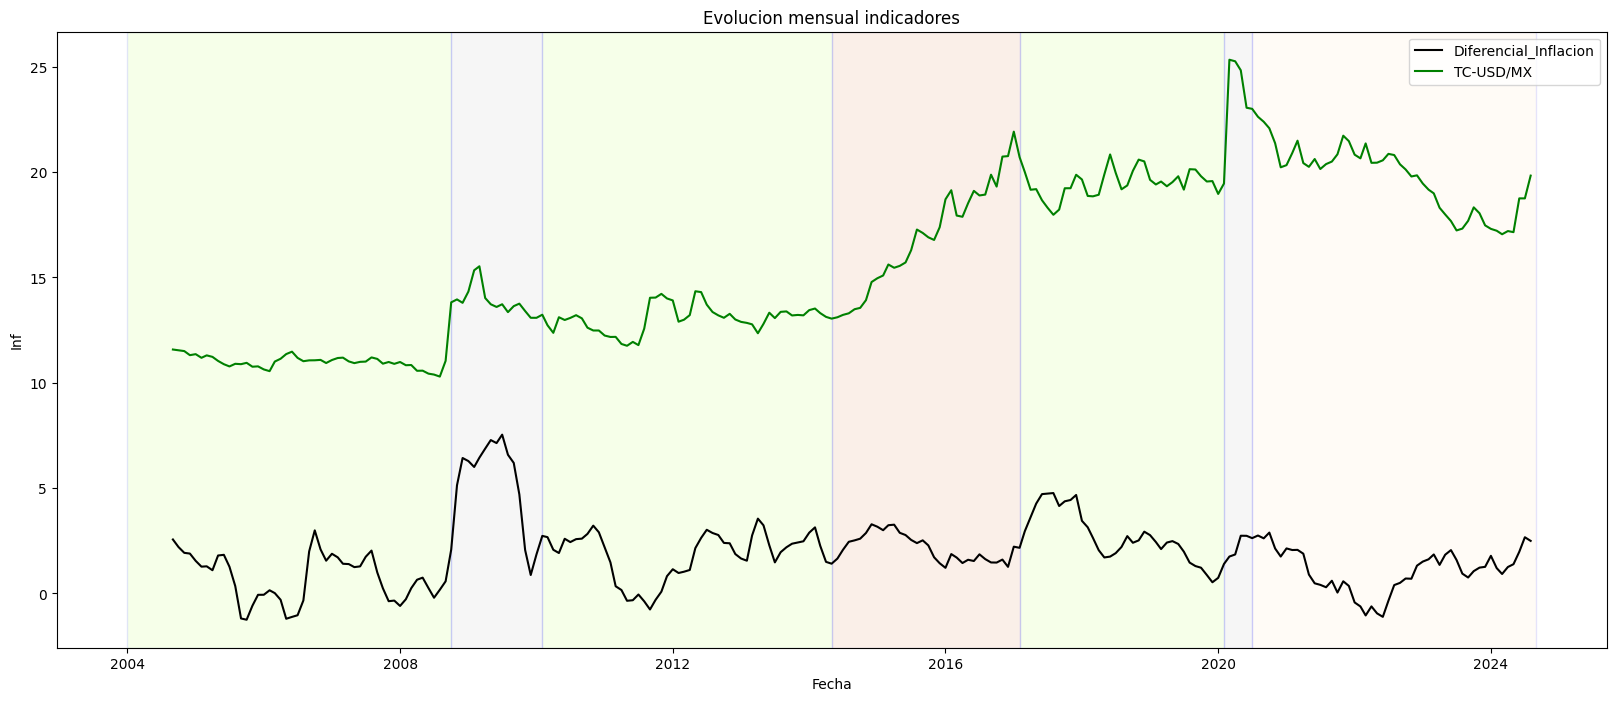

In [169]:
import matplotlib
# Generamos una gráfica de la inflacion
plt.figure(figsize = (20,8))
plt.title('Evolucion mensual indicadores')
plt.xlabel('Fecha')
plt.ylabel('Inf')
plt.plot(inf_cruz.index, inf_cruz['DIFF_INF'], label = 'Diferencial_Inflacion', color = 'black')
plt.plot(inf_cruz.index, inf_cruz['TC'], label = 'TC-USD/MX', color = 'green')

for etapa in etapas.keys():
    random_color = np.random.choice(list(matplotlib.colors.CSS4_COLORS.keys()))
    # print(random_color)
    plt.axvspan(etapas[etapa][0], etapas[etapa][1], facecolor=etapas[etapa][2] , alpha=0.1, edgecolor='blue', linewidth=1)


plt.legend()
plt.show()

Veamos cómo se relacionan estas etapas definidas con la variable de TC diaria:



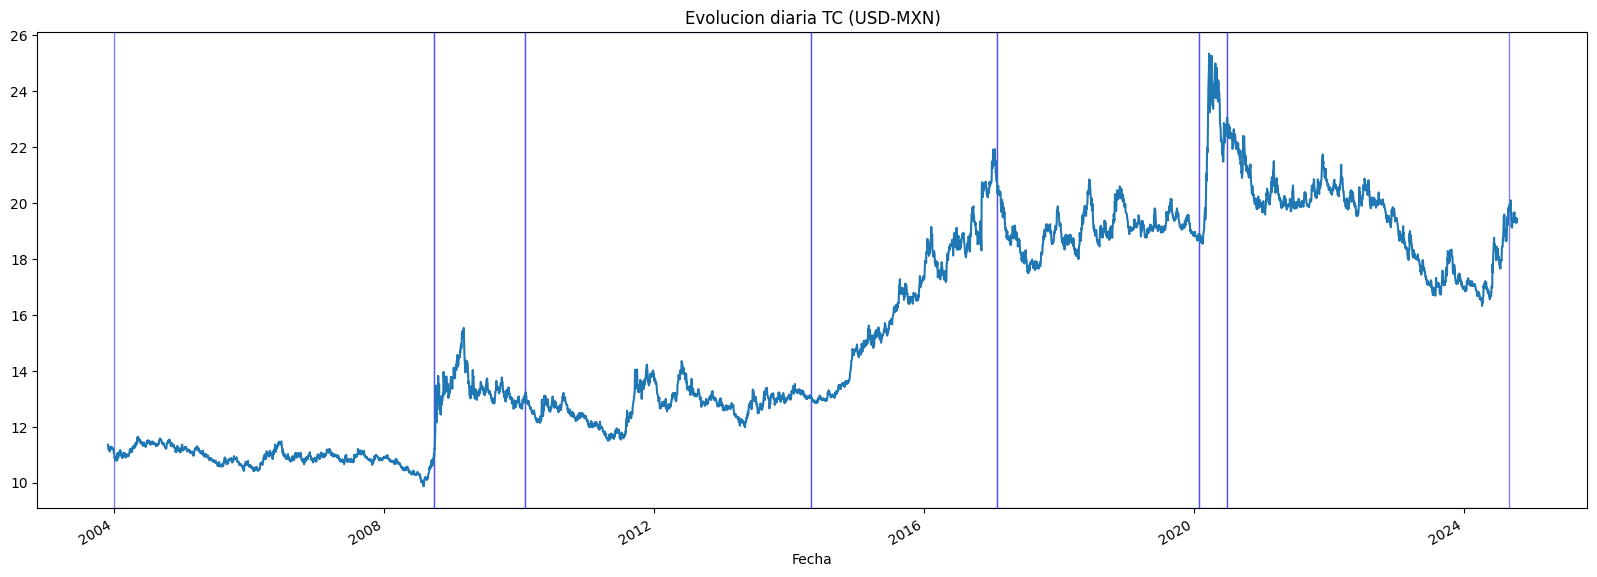

In [170]:
plt.figure(figsize=(20,7))
data['Adj Close'].plot()
plt.title('Evolucion diaria TC (USD-MXN)')

for etapa in etapas.keys():
    
    plt.axvspan(etapas[etapa][0], etapas[etapa][1], facecolor='white' , alpha=0.5, edgecolor='blue', linewidth=1)

plt.xlabel('Fecha')
plt.show()


Con esto, queremos garantizar que, las etapas se encuentran correctamente definidas tanto para el problema mensual como para el problema diario, lo que nos permite verificar que el abordaje tiene un sentido correcto. 

### **Analisis de las etapas definidas**

Pasaremos a generar un análisis del TC para cada una de las etapas definidas previamente.

1. Estabilidad 2004 - 2008
2. Crisis 2008
3. Estabilidad_13 -> 2009-2015
4. Escalada -> 2014 - 2019
5. Estabilidad_18
6. Pandemia Covid 19
7. Volatilidad


#### **Medias Móviles**

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


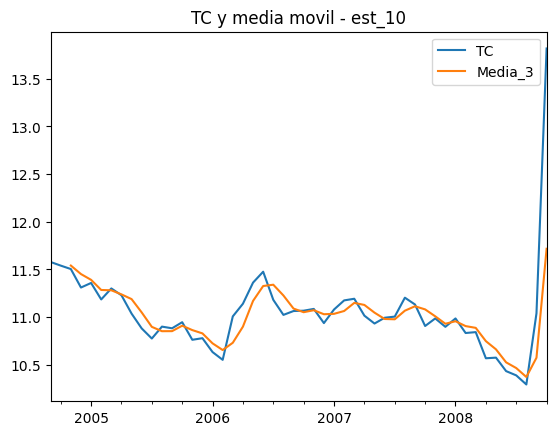

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


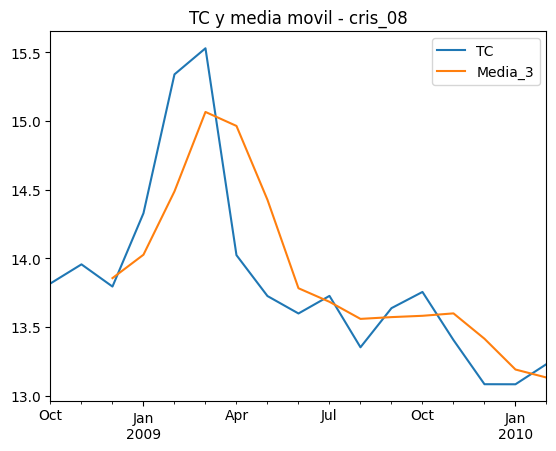

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


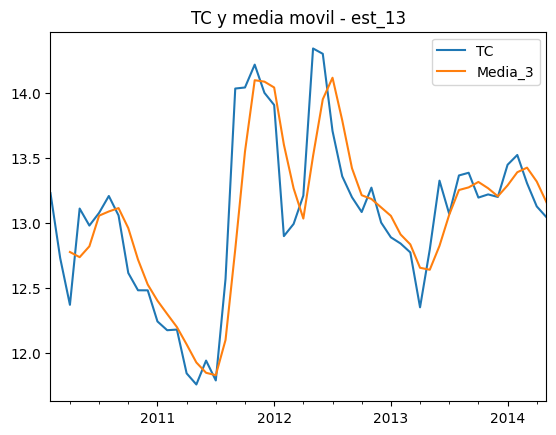

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


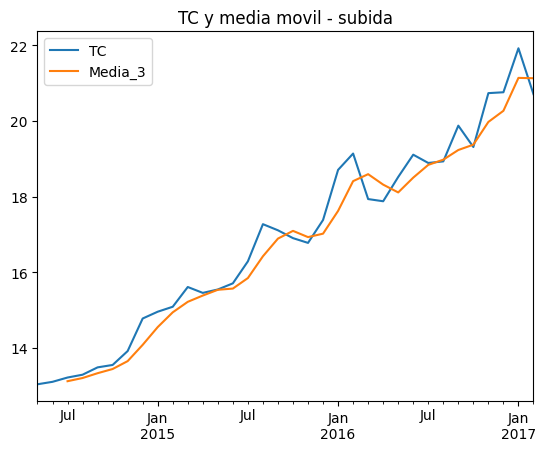

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


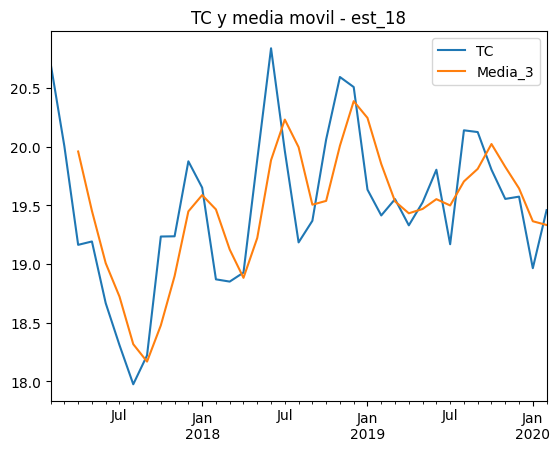

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


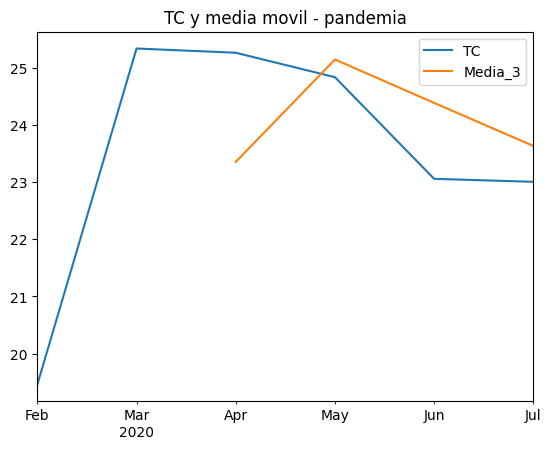

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\2875026742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()


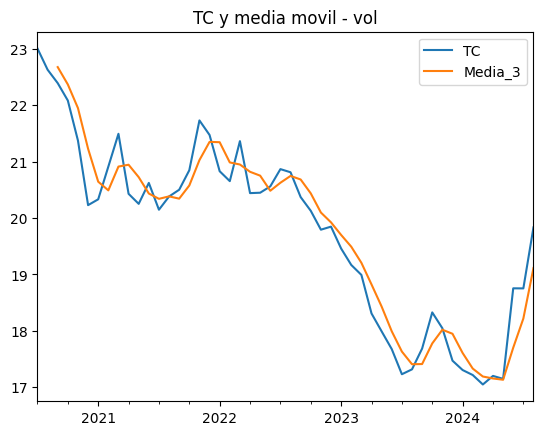

In [171]:
# Iteración por etapas
for etapa, fechas in etapas.items():
    # generamos sub conjuntos con base en las etapas definidas.
    datos_etapa = inf_cruz[(inf_cruz.index>=fechas[0])&(inf_cruz.index<=fechas[1])]

    # Media Movil de 3 meses anteriores.
    datos_etapa['Media_3'] = datos_etapa['TC'].rolling(window=3).mean()

    #Graficamos la media movil
    datos_etapa[['TC', 'Media_3']].plot(title=f'TC y media movil - {etapa}')
    plt.show()
    

#### **Correlacion Variables y volatilidad**

In [172]:
# Iteración por etapas
for etapa, fechas in etapas.items():
    # generamos sub conjuntos con base en las etapas definidas.
    datos_etapa = inf_cruz[(inf_cruz.index>=fechas[0])&(inf_cruz.index<=fechas[1])]

    # Calculo de correlaciones
    correlaciones = datos_etapa[['TC', 'INF_MX', 'INF_EU', 'DIFF_INF']].corr()

    # Calculo de volatilidad
    std_dev = datos_etapa['TC'].pct_change().std()
    prom = datos_etapa['TC'].mean()

    print(f"Estudio de periodo: {etapa}:\n")
    print(f"Volatilidad=\n", std_dev)
    print(f"TC promedio=\n", prom)
    print(f"Correlaciones :")
    display(correlaciones)
    print("")

Estudio de periodo: est_10:

Volatilidad=
 0.039765498534303834
TC promedio=
 11.055707988739014
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,0.217665,-0.231732,0.334851
INF_MX,0.217665,1.000000,0.107647,0.567580
INF_EU,-0.231732,0.107647,1.000000,-0.757436
DIFF_INF,0.334851,0.567580,-0.757436,1.000000



Estudio de periodo: cris_08:

Volatilidad=
 0.036010915577910904
TC promedio=
 13.84669999515309
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,0.626883,-0.256432,0.452304
INF_MX,0.626883,1.000000,-0.379545,0.698690
INF_EU,-0.256432,-0.379545,1.000000,-0.927076
DIFF_INF,0.452304,0.698690,-0.927076,1.000000



Estudio de periodo: est_13:

Volatilidad=
 0.03160318428121623
TC promedio=
 13.044005137223463
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,0.098198,-0.111121,0.125999
INF_MX,0.098198,1.000000,-0.383859,0.727613
INF_EU,-0.111121,-0.383859,1.000000,-0.912736
DIFF_INF,0.125999,0.727613,-0.912736,1.000000



Estudio de periodo: subida:

Volatilidad=
 0.03248079928224815
TC promedio=
 16.91200060002944
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,-0.228466,0.199641,-0.512488
INF_MX,-0.228466,1.000000,0.659926,0.288712
INF_EU,0.199641,0.659926,1.000000,-0.528808
DIFF_INF,-0.512488,0.288712,-0.528808,1.000000



Estudio de periodo: est_18:

Volatilidad=
 0.02866830859488638
TC promedio=
 19.4955270612562
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,-0.404970,0.246388,-0.468594
INF_MX,-0.404970,1.000000,0.047900,0.948015
INF_EU,0.246388,0.047900,1.000000,-0.272450
DIFF_INF,-0.468594,0.948015,-0.272450,1.000000



Estudio de periodo: pandemia:

Volatilidad=
 0.14829722020392716
TC promedio=
 23.49212137858073
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,-0.700279,-0.715497,0.315060
INF_MX,-0.700279,1.000000,0.701333,-0.000436
INF_EU,-0.715497,0.701333,1.000000,-0.713139
DIFF_INF,0.315060,-0.000436,-0.713139,1.000000



Estudio de periodo: vol:

Volatilidad=
 0.02711026729634858
TC promedio=
 19.75752380371094
Correlaciones :


,TC,INF_MX,INF_EU,DIFF_INF
TC,1.000000,0.182430,0.150176,-0.067473
INF_MX,0.182430,1.000000,0.945389,-0.653589
INF_EU,0.150176,0.945389,1.000000,-0.864586
DIFF_INF,-0.067473,-0.653589,-0.864586,1.000000


#### **Boxplot**

In [173]:
list(etapas.keys())

['est_10', 'cris_08', 'est_13', 'subida', 'est_18', 'pandemia', 'vol']

C:\Users\MI26314\AppData\Local\Temp\ipykernel_24444\4017989599.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_etapa, labels = nombres_etapas)


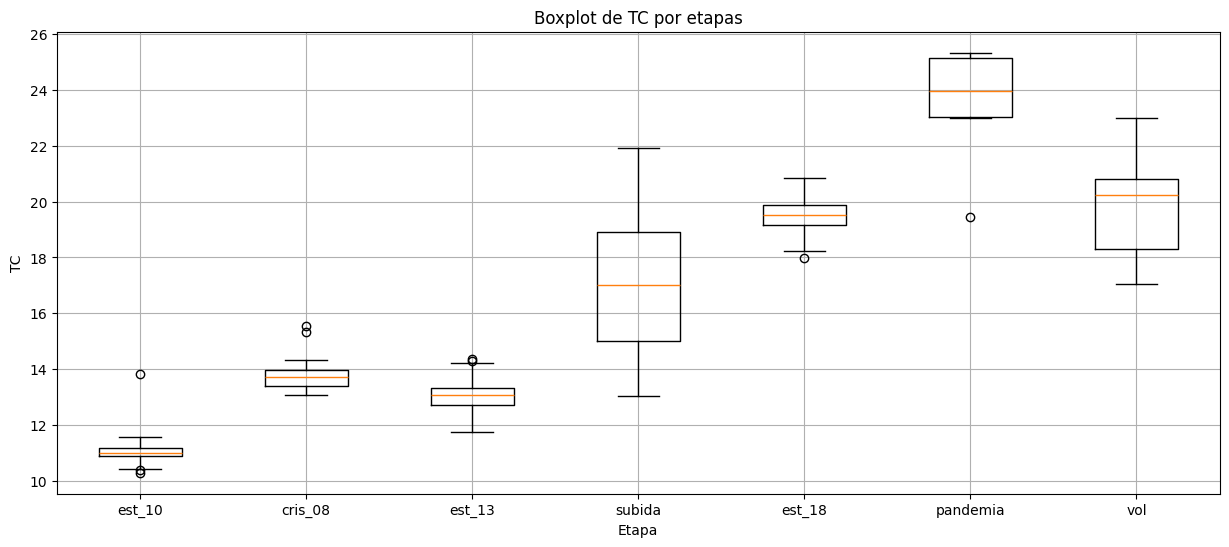

In [174]:

datos_etapa = []
nombres_etapas = list(etapas.keys())

# Iteración por etapas
for etapa, fechas in etapas.items():
    # generamos sub conjuntos con base en las etapas definidas.
    datos_etapa.append(inf_cruz[(inf_cruz.index>=fechas[0])&(inf_cruz.index<=fechas[1])]['TC'])

# Creamos boxplot
plt.figure(figsize=(15,6))
plt.boxplot(datos_etapa, labels = nombres_etapas)

# Titulos y etiquetas
plt.title('Boxplot de TC por etapas')
plt.xlabel('Etapa')
plt.ylabel('TC')
plt.grid(True)
plt.show()

En general, las variables que analizamos poseen una poca correlación con la evolución del TC. Solo en entornos de crisis, se han observado mayores niveles de asociación, sin embargo, podría definirse que, durante esos periodos de incertidumbre mudial, las variables económicas se ven afectas todas en general. 

Con el Boxplot pudimos apreciar que, aunque tienen volatilidades diferentes, el periodo de estabilidad_18 y Volatilidad, (mediados 2017 en adelante) presentan niveles promedio de TC, por lo que es el periodo en el que nos centraremos, a pesar de que tiene una pandemia en el inter, haremos un tratamiento de los datos para minimizar los efectos observados en el indicador. 


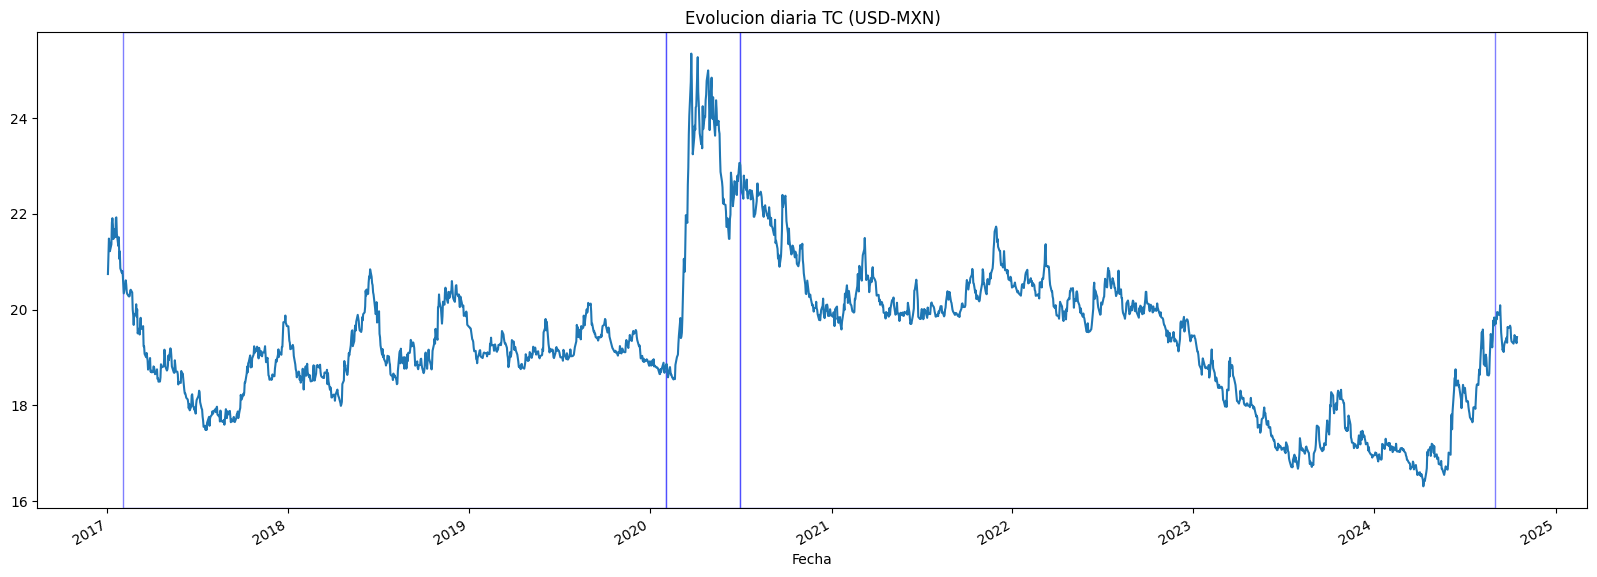

In [175]:
plt.figure(figsize=(20,7))
data['Adj Close']['2017':].plot()
plt.title('Evolucion diaria TC (USD-MXN)')

for etapa in ['est_18', 'pandemia', 'vol']:
    
    plt.axvspan(etapas[etapa][0], etapas[etapa][1], facecolor='white' , alpha=0.5, edgecolor='blue', linewidth=1)

plt.xlabel('Fecha')
plt.show()


## **Ajuste de modelos predictivos**

Para el abordaje del problema, intentaremos con 3 tipos de modelos predictivos. 

1. Simulación Monte Carlo
2. ARIMA
3. LSTM


### **Simulaciones Monte Carlo**

Este enfoque es el más sencillo posible, simplemente generaremos simulaciones con base en los valores de incrementos observados previamente durante el periodo de estudio definido, esto **suponiendo que los movimientos mantendrán la misma distribución observada durante los últimos 7 años.**

In [176]:
## Observemos los cambios que se han generado en el histórico. 

data_modelos = data[['Adj Close']]['2017':]
data_modelos.columns = ['TC']
data_modelos.head()

,TC
Date,
2017-01-02,20.740511
2017-01-03,21.120220
2017-01-04,21.479650
2017-01-05,21.385469
2017-01-06,21.216530


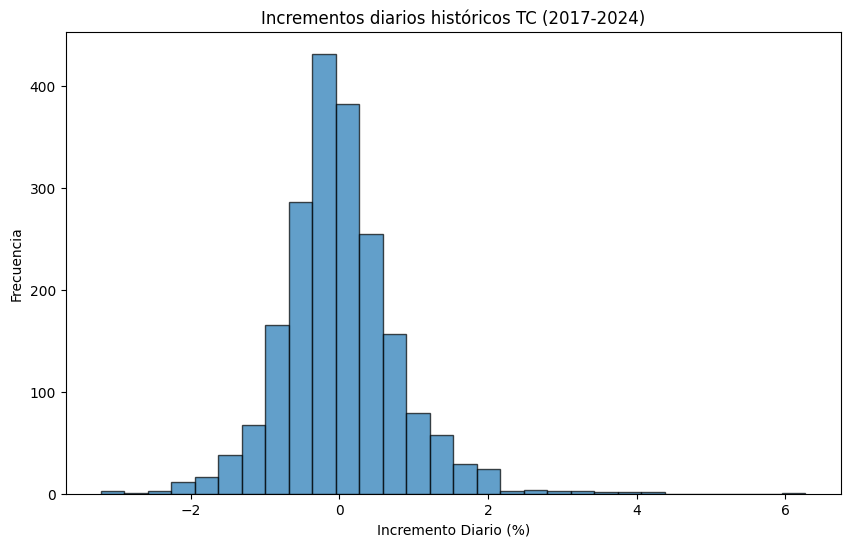

In [177]:
## Gráfica de los incrementos porcentuales históricos. 

diff_pct = data_modelos['TC'].pct_change().dropna()

# Gráfica de los incrementos.

plt.figure(figsize = (10,6))
plt.hist(diff_pct*100, bins = 30, edgecolor = 'black', alpha = 0.7)
plt.title('Incrementos diarios históricos TC (2017-2024)')
plt.xlabel('Incremento Diario (%)')
plt.ylabel('Frecuencia')
plt.show()

Generamos las simulaciones

In [178]:
diff_pct

Date
2017-01-03    0.018308
2017-01-04    0.017018
2017-01-05   -0.004385
2017-01-06   -0.007900
2017-01-09    0.006720
                ...   
2024-10-09    0.002889
2024-10-10    0.006309
2024-10-11   -0.001492
2024-10-14   -0.007144
2024-10-15    0.006550
Name: TC, Length: 2029, dtype: float64

In [179]:

## Simulaciones

n_sim = 100  # Numero de trayectorias
n_dias = 100     # Días adelante simulados

# Tomamos la última observación
ultimo_valor = data_modelos['TC'].iloc[-1]

# Generamos simulaciones extrayendo aleatoriamente los incrementos
simulaciones = np.zeros((n_dias, n_sim))

random.seed(123)

for i in range(n_sim):

    sim_incr = np.random.choice(diff_pct, size = n_dias, replace=True)

    # Calculamos la trayectoria de precios
    sim_TC = ultimo_valor*(1+sim_incr).cumprod()

    simulaciones[:, i] = sim_TC



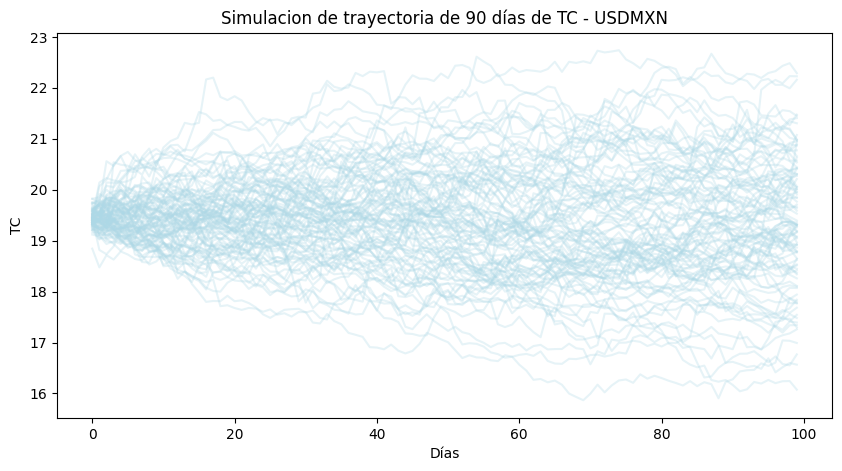

In [180]:
# Gráfica de las simulaciones

plt.figure(figsize =(10,5))
for i in range(n_sim):
    plt.plot(simulaciones[:, i], color = 'lightblue', alpha = 0.3)


plt.title('Simulacion de trayectoria de 90 días de TC - USDMXN')
plt.xlabel('Días')
plt.ylabel('TC')
plt.show()


In [181]:
ultimo_valor

np.float64(19.425949096679688)

Nos preocupan las trayectorias que terminen en un TC mayor al ultimo observado por lo que las graficaremos. De igual forma definimos un margen critico ($mc$) que nos ayudará a delimitar aquellas trayectoras que tengan como valor último:
$$ TC_{t+90} >= TC_{t}*(1+mc)$$

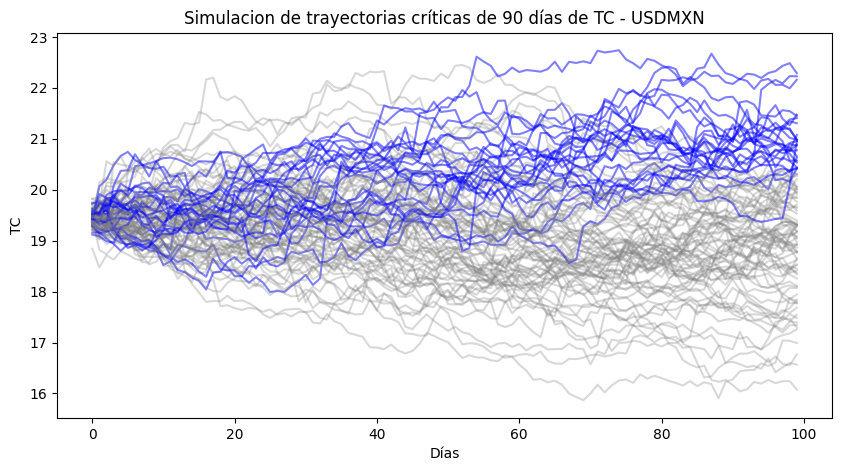

Probabilidad Rebasar Margen Crítico: 0.24


In [182]:
## Idea: En realidad nos preocupan los caminos que están por encima del último valor observado...

# Gráfica de las simulaciones
conteo = 0

# Establece cuál es el aumento máximo soportado sobre el último TC
margen_critico = 0.05


plt.figure(figsize =(10,5))
for i in range(n_sim):
    if simulaciones[:,i][-1]>ultimo_valor*(1+margen_critico):

        #Actualizamos el conteo para ver en proporción cuántos caminos nos llevan a un TC mayor en 3 meses. 
        conteo+=1    
        plt.plot(simulaciones[:, i], color = 'blue', alpha = 0.5)
    else:
        plt.plot(simulaciones[:, i], color = 'grey', alpha = 0.3)


plt.title('Simulacion de trayectorias críticas de 90 días de TC - USDMXN')
plt.xlabel('Días')
plt.ylabel('TC')
plt.show()


print("Probabilidad Rebasar Margen Crítico:", conteo/n_sim)

Juntamos las gráficas simuladas vs la real para analizar el comportamiento y determinar si son un camino estimado que hace sentido con el pasado.

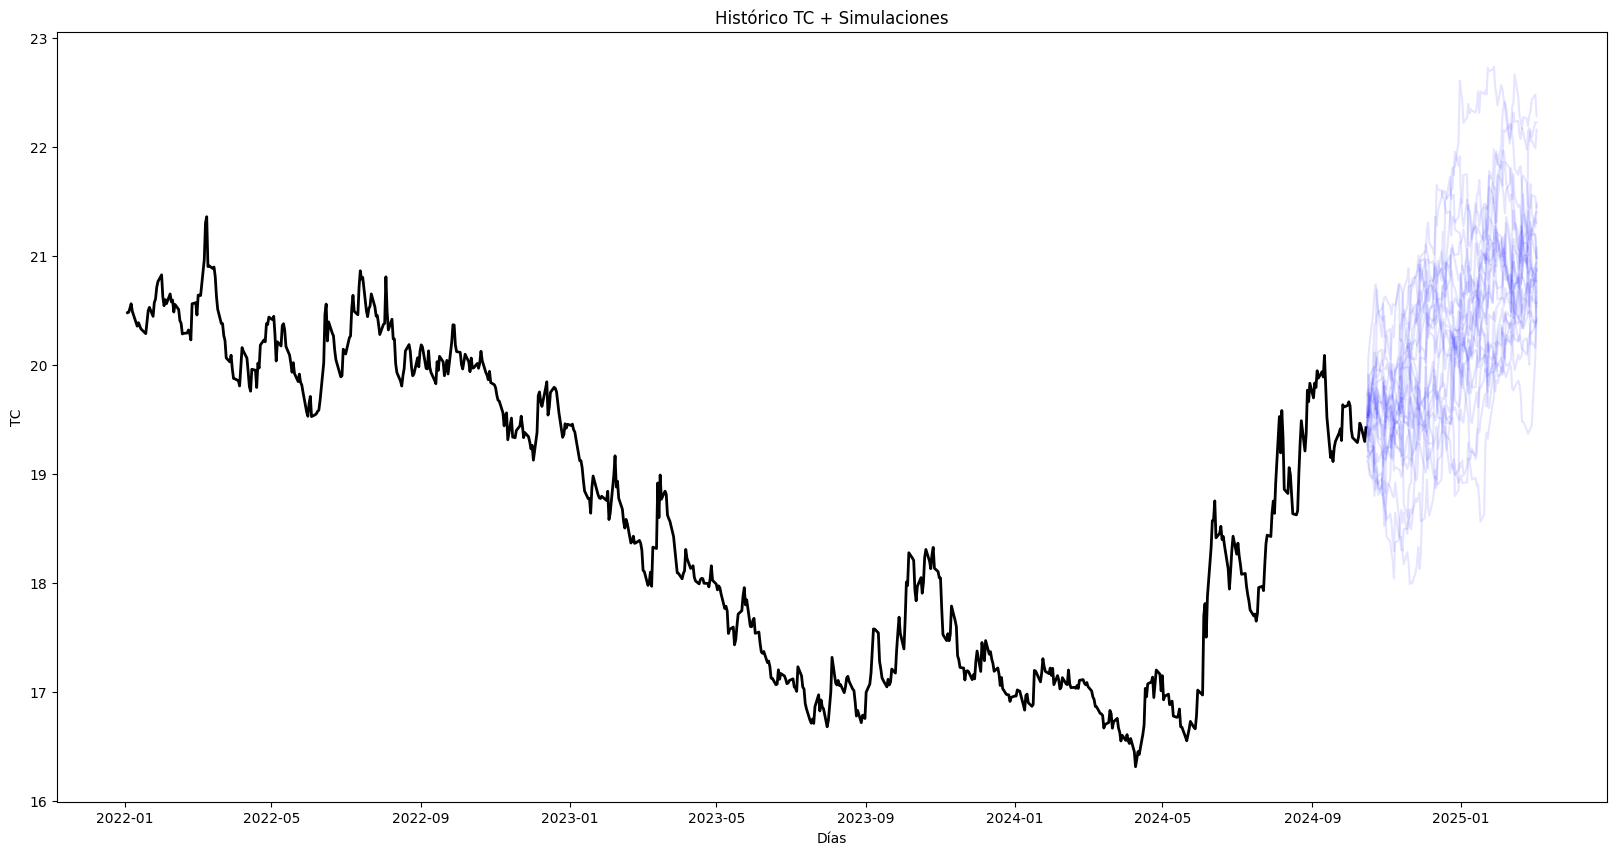

Probabilidad Rebasar Margen Crítico: 0.24


In [183]:
# Gráfica de las simulaciones
conteo = 0

# Establece cuál es el aumento máximo soportado sobre el último TC
margen_critico = 0.05


## Ajuste de las fechas

ultima_fecha = data_modelos.index[-1]

fechas_futuras = pd.date_range(start=ultima_fecha, periods = n_dias+1, freq = 'B')[1:]


plt.figure(figsize =(20,10))

plt.plot(data_modelos['2022':].index, data_modelos['2022':].TC, color = 'black', label = 'Histórico', linewidth = 2)


for i in range(n_sim):
    if simulaciones[:,i][-1]>ultimo_valor*(1+margen_critico):

        #Actualizamos el conteo para ver en proporción cuántos caminos nos llevan a un TC mayor en 3 meses. 
        conteo+=1    
        plt.plot(fechas_futuras, simulaciones[:, i], color = 'blue', alpha = 0.1)
        
    # else:
    #     plt.plot(fechas_futuras, simulaciones[:, i], color = 'grey', alpha = 0.1)



plt.title('Histórico TC + Simulaciones')
plt.xlabel('Días')
plt.ylabel('TC')
plt.show()


print("Probabilidad Rebasar Margen Crítico:", conteo/n_sim)

Dado que estuviéramos en el escenario de superar valor crítico, ¿cuál es el TC esperado?

$$ E[TC_{t+90}|TC_{t+90}>TC_t*(1+mc)]$$

Estimaremos este valor esperado:

In [184]:
## calcular el promedio de las trayectorias cuyos valore finales rebasan el margen_crítico.

simulaciones_filtradas = simulaciones[:, simulaciones[-1, :]>=ultimo_valor*(1+margen_critico)]

promedio_sim_fil = np.mean(simulaciones_filtradas, axis = 1)
promedio_sim_fil[-1]

np.float64(21.035542431171258)

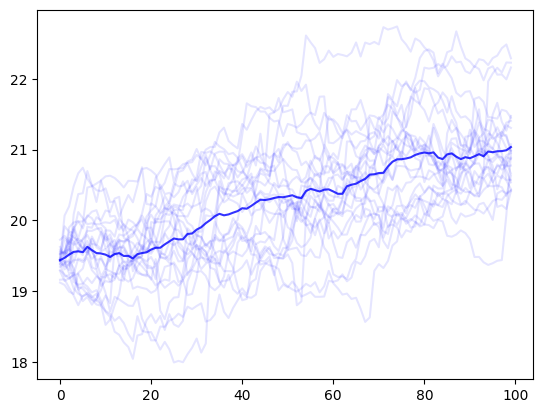

In [185]:
plt.plot(simulaciones_filtradas, color = 'blue', alpha = 0.1)
plt.plot(promedio_sim_fil, color = 'blue', alpha = 0.8)

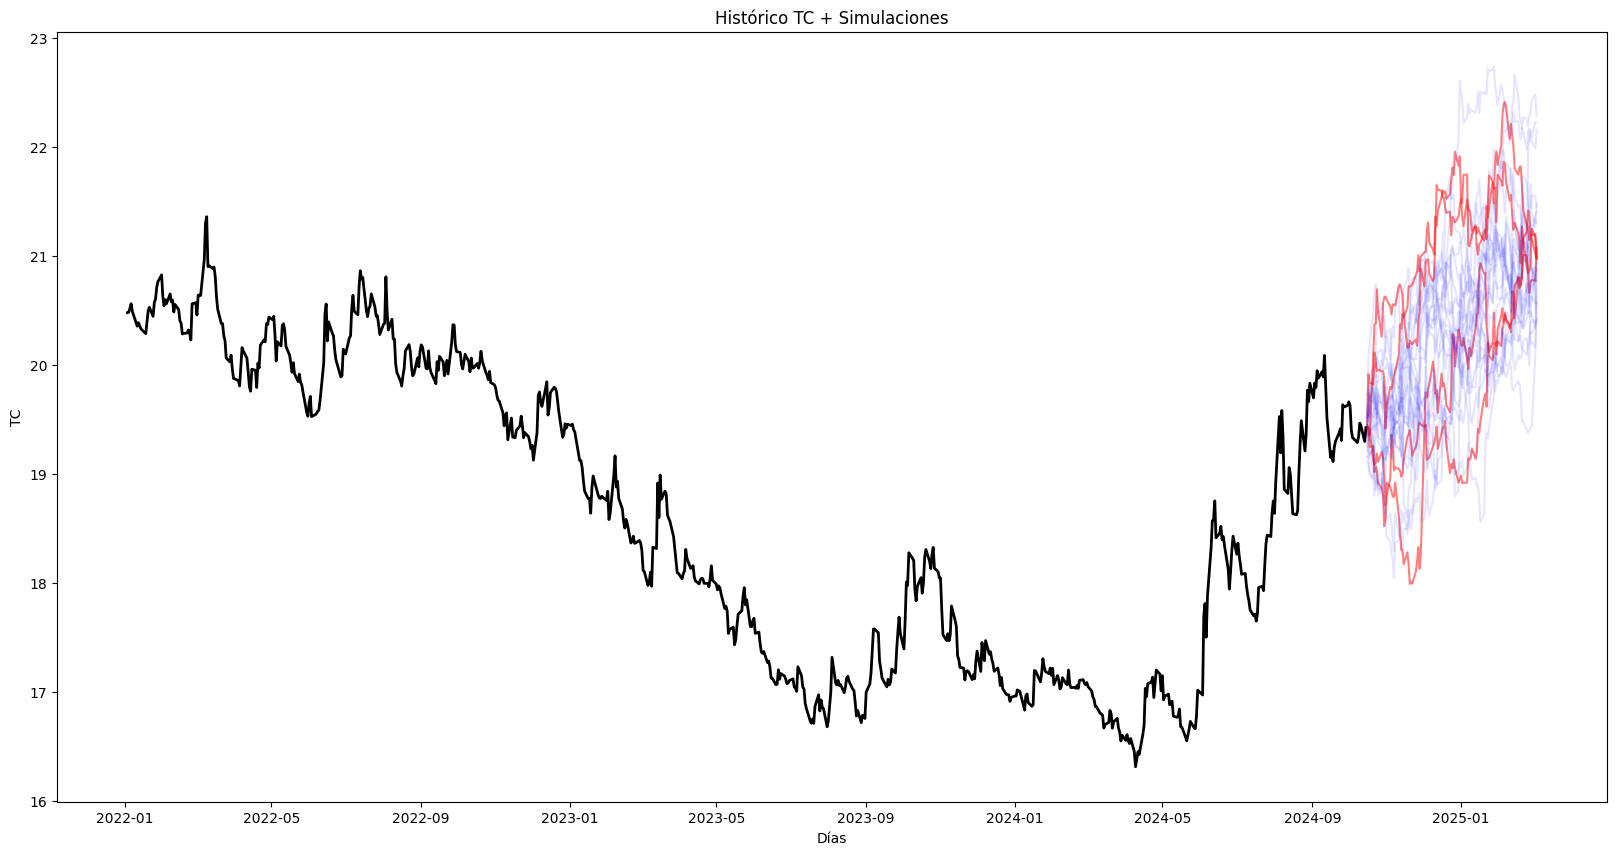

Probabilidad Rebasar Margen Crítico: 0.24


In [191]:
plt.figure(figsize =(20,10))

plt.plot(data_modelos['2022':].index, data_modelos['2022':].TC, color = 'black', label = 'Histórico', linewidth = 2)


for i in range(n_sim):
    if simulaciones[:,i][-1]>ultimo_valor*(1+margen_critico):

        if (simulaciones[:,i][-1]<promedio_sim_fil[-1]+.08) and (simulaciones[:,i][-1]>promedio_sim_fil[-1]-.08) :  
            plt.plot(fechas_futuras, simulaciones[:, i], color = 'red', alpha = 0.5)
        else:
            plt.plot(fechas_futuras, simulaciones[:, i], color = 'blue', alpha = 0.1)


plt.title('Histórico TC + Simulaciones')
plt.xlabel('Días')
plt.ylabel('TC')
plt.show()


print("Probabilidad Rebasar Margen Crítico:", conteo/n_sim)

#### **Autocorrelacion**

In [187]:
# pip install statsmodels

In [188]:
from statsmodels.graphics.tsaplots import plot_acf

Autocorrelaciones para est_10:

Autocorrelaciones para cris_08:

Autocorrelaciones para est_13:

Autocorrelaciones para subida:

Autocorrelaciones para est_18:

Autocorrelaciones para pandemia:

Autocorrelaciones para vol:



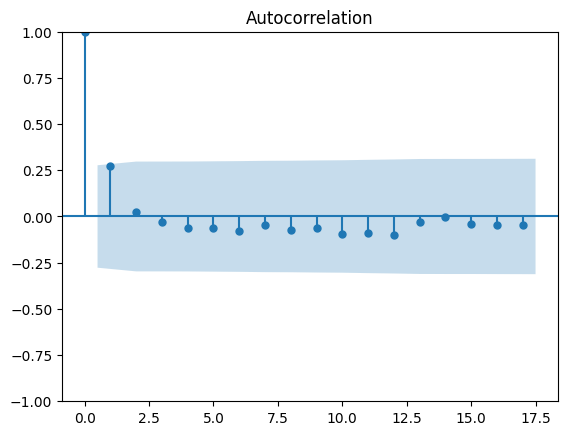

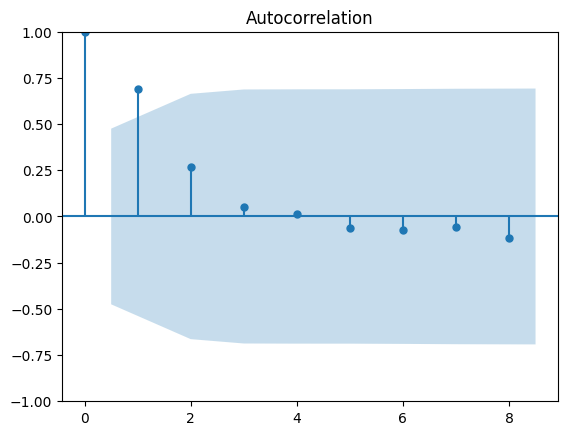

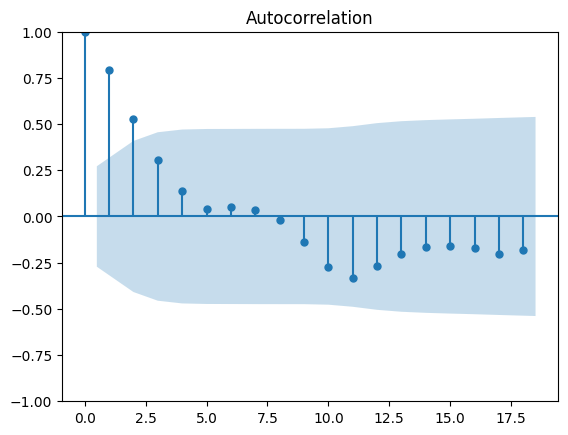

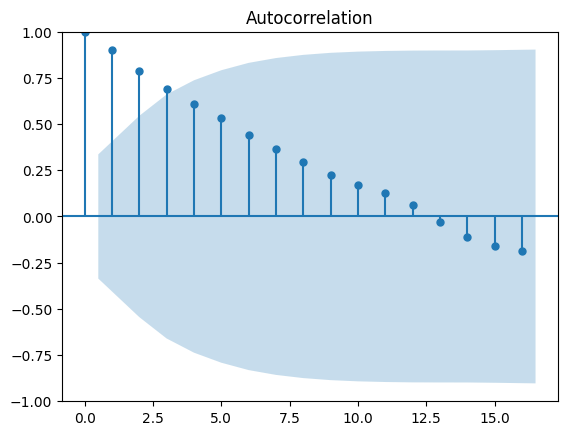

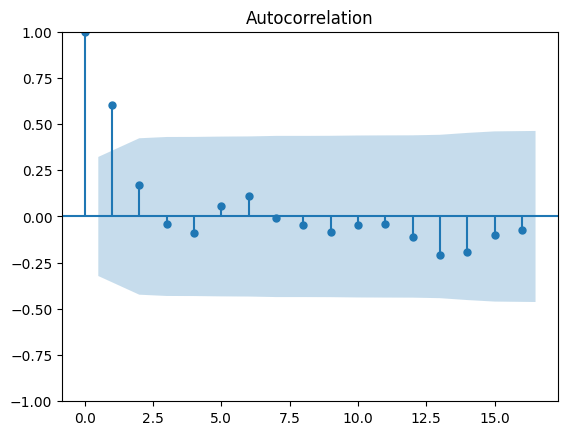

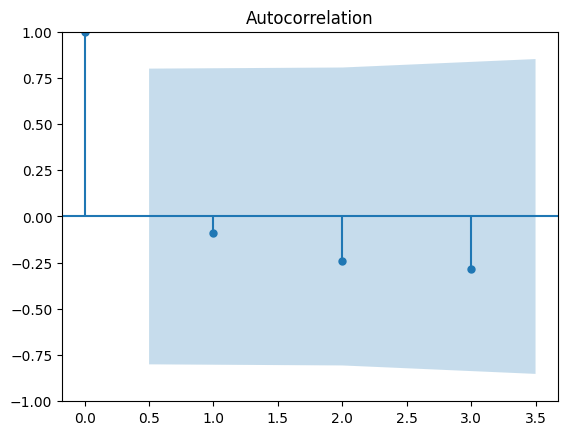

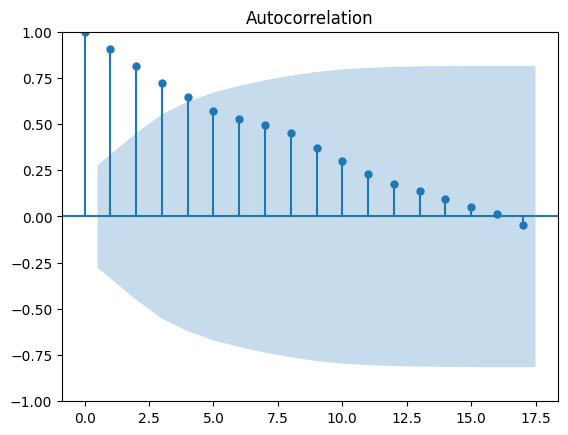

In [189]:
for etapa, fechas in etapas.items():
    # generamos sub conjuntos con base en las etapas definidas.
    datos_etapa = inf_cruz[(inf_cruz.index>=fechas[0])&(inf_cruz.index<=fechas[1])]
    
    print(f"Autocorrelaciones para {etapa}:\n")
    plot_acf(datos_etapa['TC'])


#### **Distribución de los aumentos